# Chapter.7.03 Logistic Regression

Data에 Outlier를 추가했을때 Decision Boundary를 제대로 설정하지 못하는 것을 확인했습니다<br>
pA 7.03에서는 Sigmoid 함수를 구현하고<br>
Logistic Regression을 통해서 Classification을 진행할 것입니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import basic_nodes as nodes 

import os
import sys
np.random.seed(0)


***
## Sigmoid Function

먼저 sigmoid function은 다음과 같은 식으로 표현된다.
<center>
$\sigma(x) = \frac{1}{1 + \exp^{-x}}$
</center>
이 sigmoid function을 numpy를 이용해 구현해보자.

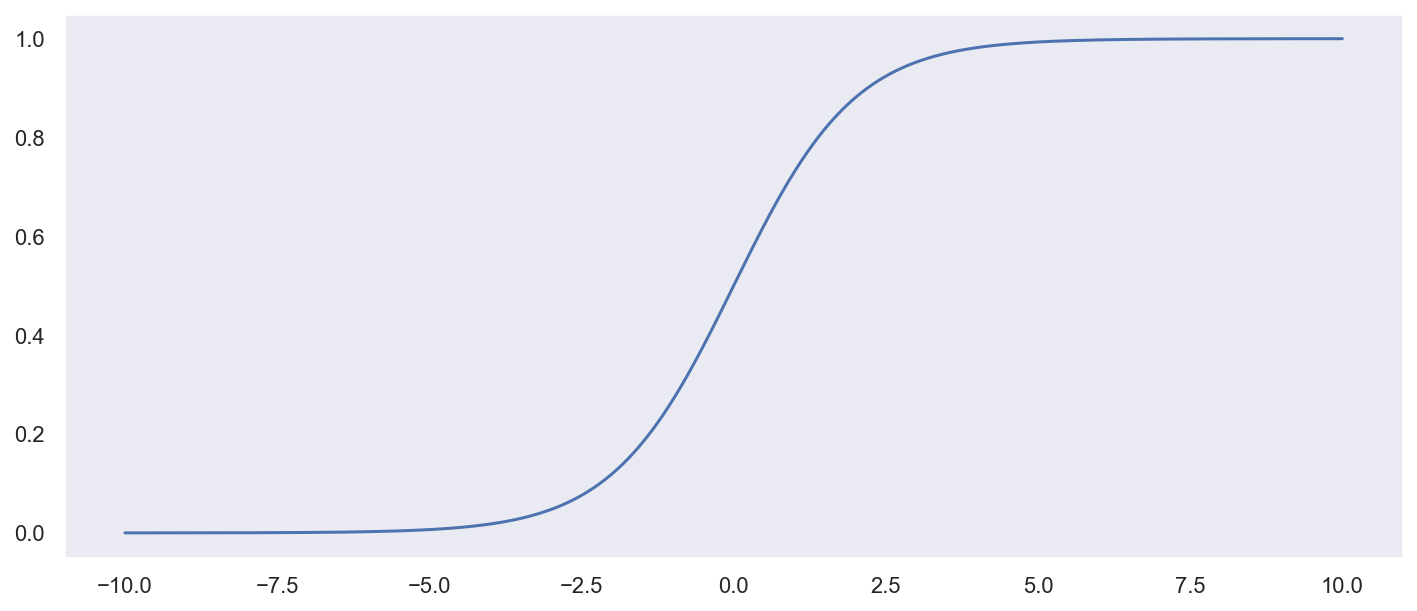

In [3]:
x_range = np.linspace(-10, 10, 1000)
# Start Sigmoid Function
y = 1/(1+np.exp(-x_range))
# End Sigmoid Function 

fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(x_range, y)
ax.grid()

**Expected Output** 
<img src='./img_7/7_03_1.png' width = 700>

## Step.1 Dataset Generator
PA 7.03에서 생성했던 Data를 똑같이 사용합니다<br><br>

Pass 학생과 Non Pass 학생을 각각 50명씩 생성한다<br>
학생 최소/최대 공부시간을 hour_m,hour_M으로 잡고 decision boundary를 hour_b로 만든다<br>
NP 학생들은 0 ~ 5시간 공부시간을 가지고 P학생들은  5 ~ 10시간의 공부시간을 가진다<br><br>

Pass 학생과 Non Pass 학생의 y값은 각각 1, 0으로 만든다<br><br>

추가로 Outlier 학생들을 더해주는데<br>
20명의 학생들을 최소/최대 공부시간을 20~23시간으로 가지게 만든다<br>
마찬가지로 Pass 학생이므로 y값은 1로 한다

In [4]:
n_P, n_NP = 50, 50
# 학생들의 최소/최대 공부시간을 hour_m, hour_M으로 잡고 decision boundary를 hour_b로 만듦
# 즉, NP학생들은 0~5시간 공부시간을 가지고 P학생들은 5~10시간의 공부시간을 가짐
hour_m, hour_b, hour_M = 0, 5, 10

### Start Dataset Genaration
study_hour_P = np.random.uniform(low = hour_b, high = hour_M, size = (n_P,))
study_hour_NP = np.random.uniform(low = hour_m, high = hour_b, size = (n_NP,))


# P, NP학생들의 y값들은 각각 1, 0으로 만들어줌
result_P = np.ones_like(study_hour_P)
result_NP = np.zeros_like(study_hour_NP)

### End Dataset Generation
n_out = 20
hour_out_m, hour_out_M = 20, 23

study_hour_outlier = np.random.uniform(low = hour_out_m, high = hour_out_M, size = n_out)
result_outlier = np.ones_like(study_hour_outlier)

study_hour_P = np.append(study_hour_P,study_hour_outlier)
result_P = np.append(result_P,result_outlier)

x_data = np.hstack([study_hour_P,study_hour_NP])
y_data = np.hstack([result_P,result_NP])


print("study_hour_P:", study_hour_P[:5])
print("study_hour_NP:", study_hour_NP[:5])
print("result_P:", result_P[:5])
print("result_NP:", result_NP[:5], '\n')
print("study_hour_P.shape:", study_hour_P.shape)
print("study_hour_NP.shape:", study_hour_NP.shape)
print("result_P.shape:", result_P.shape)
print("result_NP.shape:", result_NP.shape)

study_hour_P: [7.74406752 8.57594683 8.01381688 7.72441591 7.118274  ]
study_hour_NP: [2.85098385 2.19300757 4.94186919 0.51022405 1.04438378]
result_P: [1. 1. 1. 1. 1.]
result_NP: [0. 0. 0. 0. 0.] 

study_hour_P.shape: (70,)
study_hour_NP.shape: (50,)
result_P.shape: (70,)
result_NP.shape: (50,)


**Expected Output**  
study_hour_P: [7.74406752 8.57594683 8.01381688 7.72441591 7.118274  ]<br>
study_hour_NP: [2.85098385 2.19300757 4.94186919 0.51022405 1.04438378]<br>
result_P: [1. 1. 1. 1. 1.]<br>
result_NP: [0. 0. 0. 0. 0.] <br><br>

study_hour_P.shape: (70,)<br>
study_hour_NP.shape: (50,)<br>
result_P.shape: (70,)<br>
result_NP.shape: (50,)

##  Step.2 Dataset Visualization

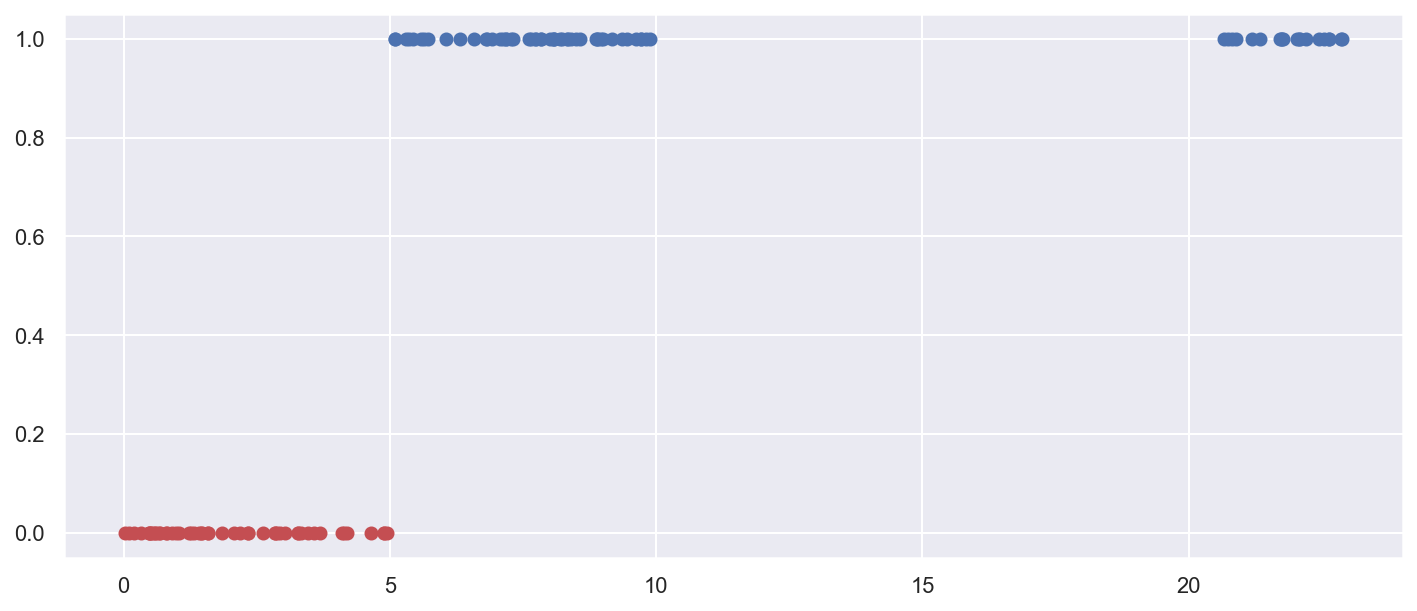

In [6]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_data[:n_P + n_out], y_data[:n_P + n_out], 'bo')
ax.plot(x_data[n_P + n_out:], y_data[n_P + n_out:], 'ro')
#ax.grid()

**Expected Output** 
<img src='./img_7/7_03_2.png' width = 700>

## Step.3 Sigmoid_node
앞에서 만들었던 sigmoid를 node class로 구성합니다

In [8]:
class sigmoid_node():
    def __init__(self):
        self.x, self.y = None, None
        
    def forward(self, x):
        self.x, self.y = x, 1/(1+np.exp(-1*x))
        return self.y
    def backward(self, dL):
        return dL*(self.y*(1-self.y))
    
test_sigmoid = sigmoid_node()
test_x = np.array([1, 2, 3, 4, 5])
print(test_sigmoid.forward(test_x))
print(test_sigmoid.backward(1))


[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]
[0.19661193 0.10499359 0.04517666 0.01766271 0.00664806]


**Expected Output**  
[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]<br>
[0.19661193 0.10499359 0.04517666 0.01766271 0.00664806]

## Step.4 Parameter 설정
basic_nodes에서 필요한 node들을 import 하고<br>
학습에 필요한 Parameter들을 설정해줍니다
* lr  = 0.1
* epochs = 50000
* 초기 theta 값 = 0.1, 0.1

In [9]:
node1 = nodes.mul_node()
node2 = nodes.plus_node()
node3 = sigmoid_node()
node4 = nodes.minus_node()
node5 = nodes.square_node()
node6 = nodes.mean_node()

In [10]:
th_list = [0.1, 0.1]
lr = 0.1
epochs = 50000 
cost_list = []
theta1_list, theta0_list = [], []

## Step.5 Learning
PA 7.02와 동일한 방법으로 학습합니다

In [11]:
for i in range(epochs):
    Z1 = node1.forward(th_list[1], x_data)
    Z2 = node2.forward(Z1, th_list[0])
    Z3 = node3.forward(Z2)
    Z4 = node4.forward(y_data, Z3)
    L = node5.forward(Z4)
    J = node6.forward(L)
    
    dL = node6.backward(1)
    dZ4 = node5.backward(dL)
    dY, dZ3 = node4.backward(dZ4)
    dZ2 = node3.backward(dZ3)
    dZ1, dTheta0 = node2.backward(dZ2)
    dTheta1, dX = node1.backward(dZ1)
    
    
    th_list[1] = th_list[1] - lr*np.sum(dTheta1)
    th_list[0] = th_list[0] - lr*np.sum(dTheta0)
    
    cost_list.append(J)
    theta1_list.append(th_list[1])
    theta0_list.append(th_list[0])

## Step.6 Visualization

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


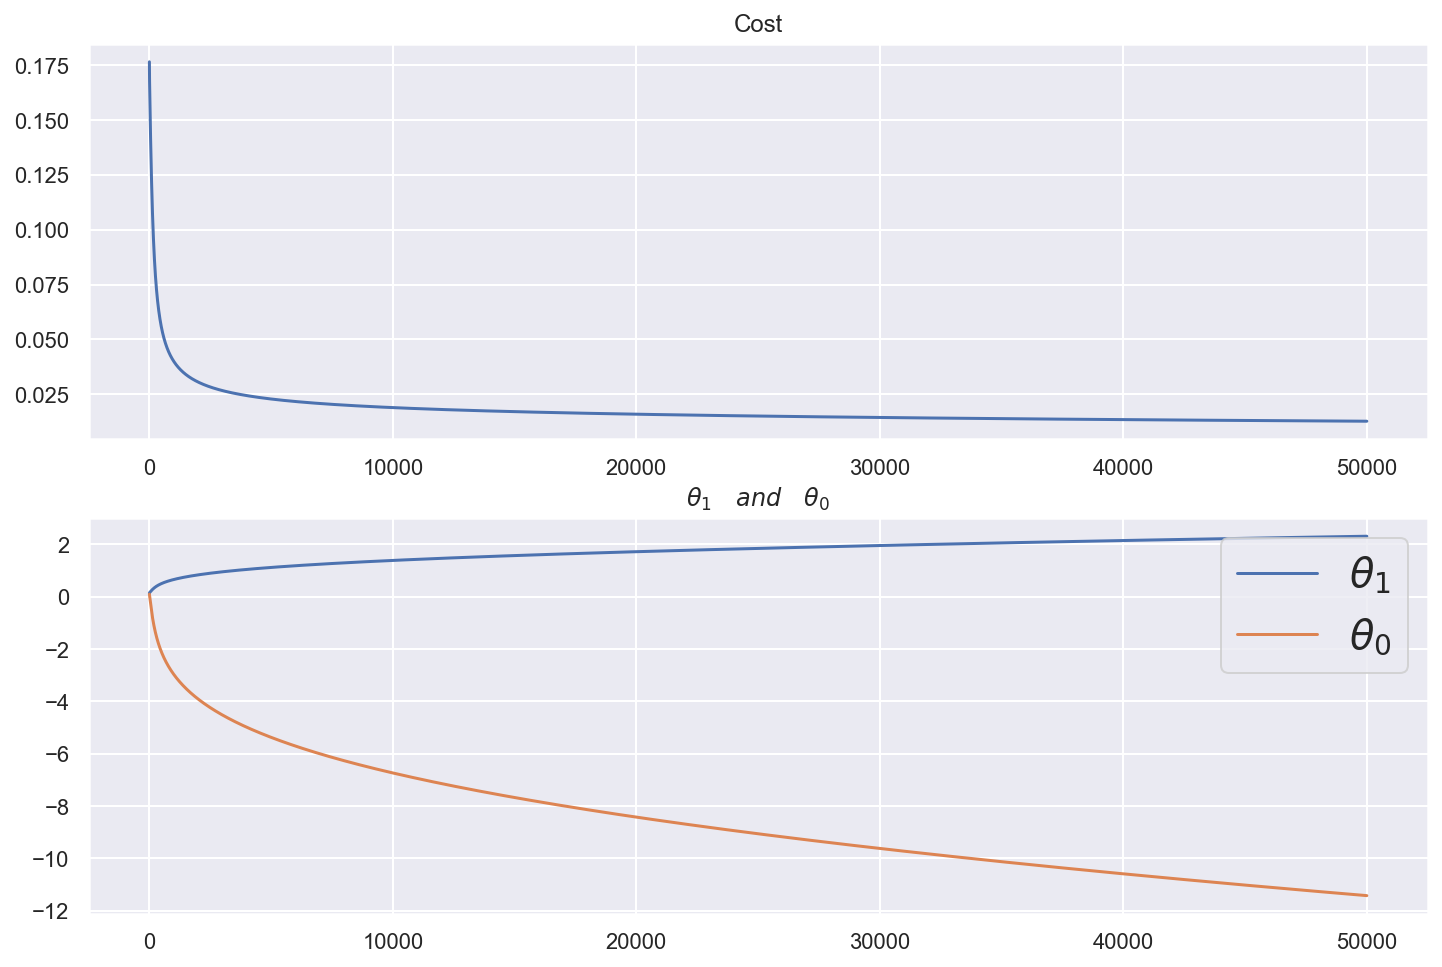

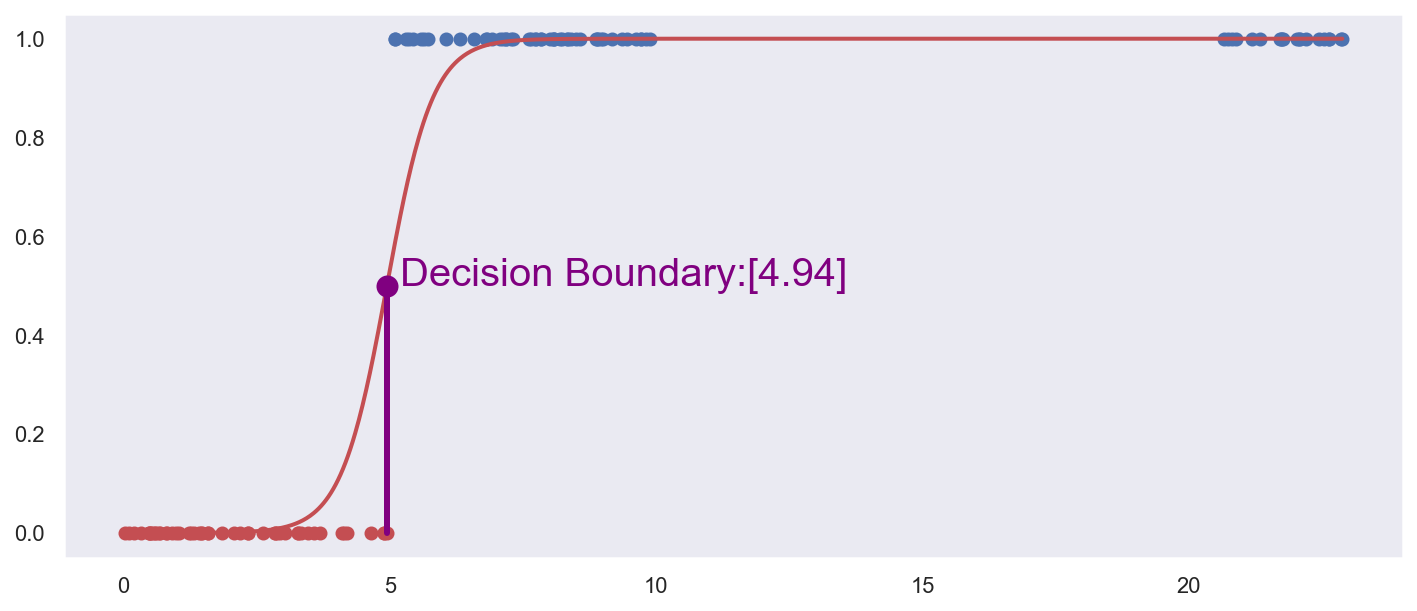

In [12]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
ax[0].set_title("Cost")
ax[1].set_title(r'$\theta_{1} \quad and \quad \theta_{0}$')
ax[0].plot(cost_list)
ax[1].plot(theta1_list, label = r'$\theta_{1}$')
ax[1].plot(theta0_list, label = r'$\theta_{0}$')
ax[1].legend(loc = 'upper right', fontsize = 20)

x_min, x_max = x_data.min(), x_data.max()
y_min, y_max = node3.forward(x_min*th_list[1] + th_list[0]), node3.forward(x_max*th_list[1] + th_list[0])
x_range = np.linspace(x_min, x_max, 1000)
y_range = node3.forward(x_range*th_list[1] + th_list[0])
y_d_idx = np.where(np.abs(y_range - 0.5) == np.min(np.abs(y_range - 0.5)))
x_d_val = x_range[y_d_idx]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_data[:n_P + n_out], y_data[:n_P + n_out], 'bo')
ax.plot(x_data[n_P + n_out:], y_data[n_P + n_out:], 'ro')
ax.plot(x_range, y_range, 'r', linewidth = 2)
ax.plot([x_range[y_d_idx], x_range[y_d_idx]], [0, y_range[y_d_idx]], 'purple', linewidth = 3)
ax.plot(x_range[y_d_idx], y_range[y_d_idx], 'purple', marker = 'o', markersize = 10)
ax.text(x_range[y_d_idx]*1.05, y_range[y_d_idx],
        s = "Decision Boundary:" + str(np.round(x_range[y_d_idx], 2)),
       fontdict = {'color':  'purple', 'fontsize': 20})
ax.grid()

**Expected Output** 
<img src='./img_7/7_03_3.png' width = 700>
<img src='./img_7/7_03_4.png' width = 700>